### Установка библиотек

In [12]:
import pandas as pd
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
from sklearn.pipeline import make_pipeline
import trimap
import pacmap
import umap
import psutil
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

### Предобработка данных

In [3]:
data = pd.DataFrame(X)

In [4]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

In [5]:
na_index = X.loc[X.isna().any(axis=1)].index.tolist()

In [6]:
y_proc = y.drop(index=na_index)
X_proc = X.drop(index=na_index)

In [7]:
X_proc

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0


In [8]:
y_proc

,num
0,0
1,2
2,1
3,0
4,0
...,...
297,1
298,1
299,2
300,3


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_proc, y_proc, test_size=0.3, random_state=52, shuffle=True,stratify=y_proc)

In [10]:
y_test

,num
206,3
199,1
137,3
132,0
135,0
...,...
120,3
156,1
26,0
176,0


array([[<Axes: title={'center': 'num'}>]], dtype=object)

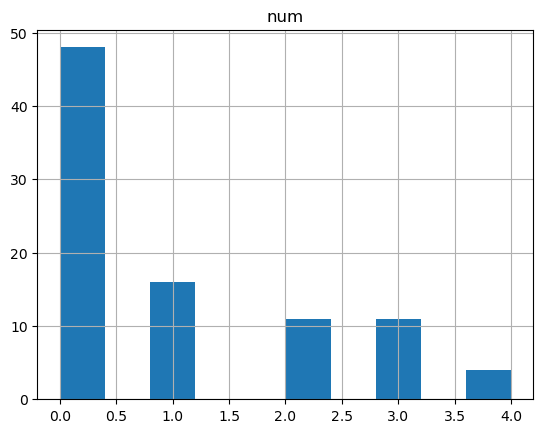

In [11]:
y_test.hist()

array([[<Axes: title={'center': 'num'}>]], dtype=object)

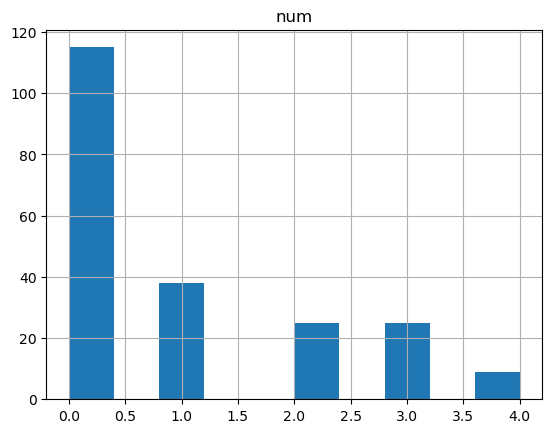

In [17]:
y_train.hist()

In [14]:
from sklearn.preprocessing import StandardScaler

In [21]:
parameters = {'kernel':["linear", "poly", "rbf", "sigmoid"], 'C': [0.1, 1, 10, 100], "degree": [2, 3, 4]}


svc = SVC()
clf = GridSearchCV(svc, parameters, cv=4)
clf.fit(X_train, y_train.values.ravel())


GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [22]:
print(clf.best_estimator_)
print(clf.best_params_)

SVC(C=0.1, degree=2, kernel='linear')
{'C': 0.1, 'degree': 2, 'kernel': 'linear'}


In [23]:
y_pred = clf.best_estimator_.predict(X_test)
y_pred

array([2, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0,
       0, 0, 0, 3, 0, 0, 3, 0, 0, 3, 3, 2, 0, 2, 0, 1, 3, 2, 0, 1, 0, 0,
       0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 3, 3, 0, 0,
       0, 0, 0, 0, 1, 0, 2, 3, 0, 2, 0, 0, 1, 0, 3, 0, 3, 0, 2, 1, 0, 0,
       3, 0], dtype=int64)

In [24]:
print(f"Recall {recall_score(y_test, y_pred, average='weighted')}")
print(f"Precision {precision_score(y_test, y_pred, average='weighted')}")
print(f"F1 {f1_score(y_test, y_pred, average='weighted')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

Recall 0.5444444444444444
Precision 0.48000000000000004
F1 0.5092601440427529
Accuracy 0.5444444444444444


c:\Users\Felix-PC\miniconda3\envs\mirea_isat_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


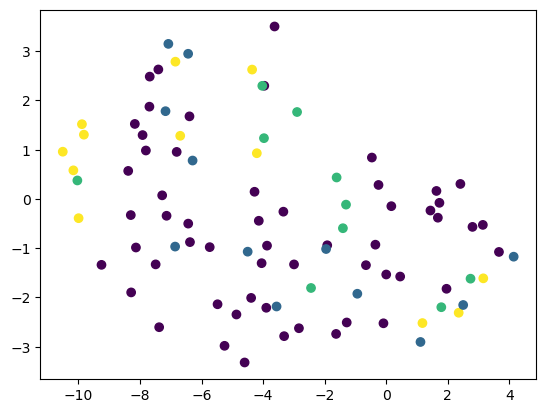

In [25]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_test)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred, cmap='viridis')

c:\Users\Felix-PC\miniconda3\envs\mirea_isat_env\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


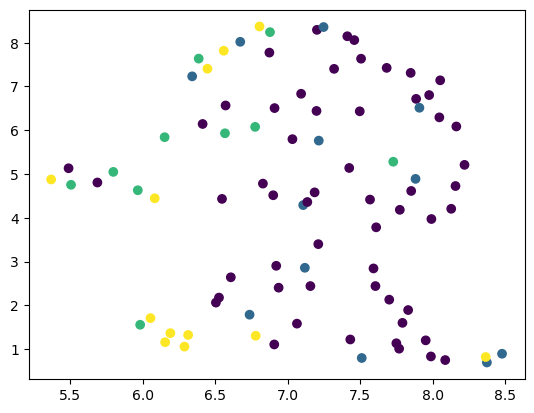

In [26]:
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_test)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_pred, cmap='viridis')

[]

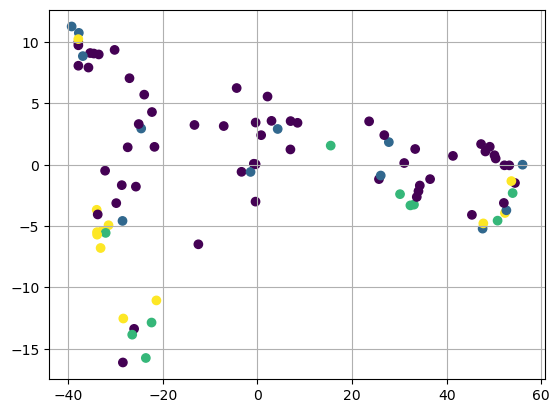

In [27]:
X_embedded = trimap.TRIMAP(n_dims=2).fit_transform(X_test.values)
plt.grid()
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_pred, cmap='viridis')
plt.plot()

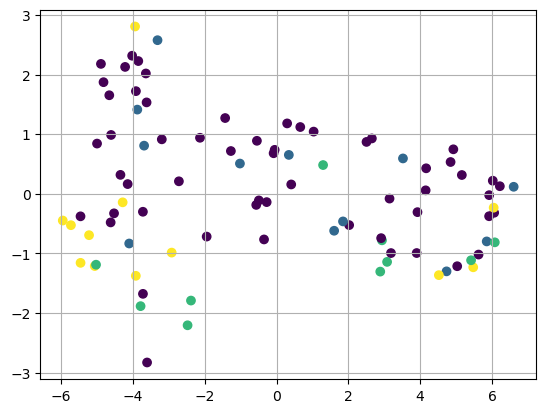

In [28]:
embedding = pacmap.PaCMAP(n_components=2, n_neighbors =15)
X_transformed = embedding.fit_transform(X_test, init="pca")
plt.grid()
plt.scatter(X_transformed[:, 0], X_transformed[:, 1] , c=y_pred, cmap='viridis')

In [29]:
### KNN

parameters = {'n_neighbors': list(range(3, 100)),
             "weights": ["uniform", "distance"],
             "algorithm":['ball_tree', 'kd_tree', 'brute', #'auto'
                         ]}
knn = KNeighborsClassifier()
knn_clf = GridSearchCV(knn, parameters, cv=4, n_jobs=psutil.cpu_count(logical=False))
knn_clf.fit(X_train, y_train.values.ravel())


c:\Users\Felix-PC\miniconda3\envs\mirea_isat_env\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=4, estimator=KNeighborsClassifier(), n_jobs=6,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, 32, ...],
                         'weights': ['uniform', 'distance']})

In [30]:
print(knn_clf.best_estimator_)
print(knn_clf.best_params_)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=18)
{'algorithm': 'ball_tree', 'n_neighbors': 18, 'weights': 'uniform'}


In [31]:
y_pred = knn_clf.best_estimator_.predict(X_test)
y_pred

array([1, 3, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [32]:
print(f"Recall {recall_score(y_test, y_pred, average='weighted')}")
print(f"Precision {precision_score(y_test, y_pred, average='weighted')}")
print(f"F1 {f1_score(y_test, y_pred, average='weighted')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

Recall 0.5555555555555556
Precision 0.4699728997289973
F1 0.43114774114774124
Accuracy 0.5555555555555556


c:\Users\Felix-PC\miniconda3\envs\mirea_isat_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


c:\Users\Felix-PC\miniconda3\envs\mirea_isat_env\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Felix-PC\miniconda3\envs\mirea_isat_env\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


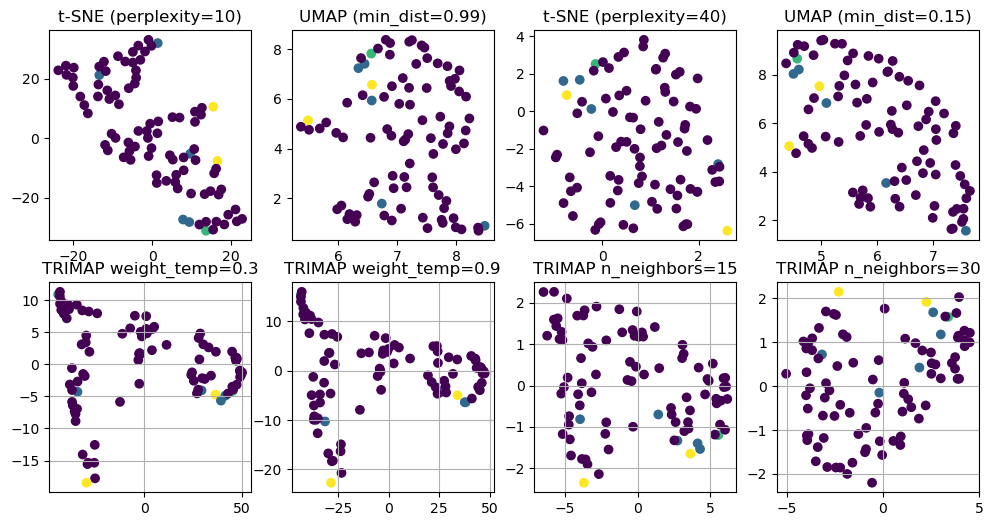

In [33]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 4, 1)
tsne = TSNE(n_components=2, perplexity=10, random_state=42)
X_tsne = tsne.fit_transform(X_test)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred, cmap='viridis')
plt.title('t-SNE (perplexity=10)')

plt.subplot(2, 4, 2)
umap_model = umap.UMAP(n_components=2, min_dist=0.1, random_state=42)
X_umap = umap_model.fit_transform(X_test)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_pred, cmap='viridis')
plt.title('UMAP (min_dist=0.99)')

plt.subplot(2, 4, 3)
tsne = TSNE(n_components=2, perplexity=40, random_state=42)
X_tsne = tsne.fit_transform(X_test)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred, cmap='viridis')
plt.title('t-SNE (perplexity=40)')

plt.subplot(2, 4, 4)
umap_model = umap.UMAP(n_components=2, min_dist=0.15, random_state=42)
X_umap = umap_model.fit_transform(X_test)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_pred, cmap='viridis')
plt.title('UMAP (min_dist=0.15)')

plt.subplot(2, 4, 5)
X_embedded = trimap.TRIMAP(n_dims=2, weight_temp=0.3).fit_transform(X_test.values)
plt.grid()
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_pred, cmap='viridis')
plt.title('TRIMAP weight_temp=0.3')

plt.subplot(2, 4, 6)
X_embedded = trimap.TRIMAP(n_dims=2, weight_temp=0.9).fit_transform(X_test.values)
plt.grid()
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_pred, cmap='viridis')
plt.title('TRIMAP weight_temp=0.9')

plt.subplot(2, 4, 7)
embedding = pacmap.PaCMAP(n_components=2, n_neighbors=15)
X_transformed = embedding.fit_transform(X_test, init="pca")
plt.grid()
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_pred, cmap='viridis')
plt.title('TRIMAP n_neighbors=15')

plt.subplot(2, 4, 8)
embedding = pacmap.PaCMAP(n_components=2, n_neighbors=30)
X_transformed = embedding.fit_transform(X_test, init="pca")
plt.grid()
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_pred, cmap='viridis')
plt.title('TRIMAP n_neighbors=30')


plt.show()

In [34]:
### RF

parameters = {"n_estimators": list(range(10, 100, 10)),
             "criterion": ["gini", "entropy", "log_loss"],
             "max_depth": list(range(2, 15)),
              "max_features": ["sqrt", "log2", None]
             }
rf = RandomForestClassifier()
rf_clf = GridSearchCV(rf, parameters, cv=4, n_jobs=psutil.cpu_count(logical=False))
rf_clf.fit(X_train, y_train.values.ravel())


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=6,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90]})

In [35]:
print(rf_clf.best_estimator_)
print(rf_clf.best_params_)

RandomForestClassifier(criterion='entropy', max_depth=9, max_features='log2',
                       n_estimators=40)
{'criterion': 'entropy', 'max_depth': 9, 'max_features': 'log2', 'n_estimators': 40}


In [36]:
y_pred = rf_clf.best_estimator_.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 3, 0, 0, 3, 0, 0, 2, 2, 2, 0, 4, 0, 1, 3, 4, 0, 0, 0, 0,
       0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 3, 0, 0, 3, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 3, 0, 2, 0, 2, 0, 1, 1, 0, 0,
       1, 0], dtype=int64)

In [37]:
print(f"Recall {recall_score(y_test, y_pred, average='weighted')}")
print(f"Precision {precision_score(y_test, y_pred, average='weighted')}")
print(f"F1 {f1_score(y_test, y_pred, average='weighted')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

Recall 0.5777777777777777
Precision 0.5013888888888889
F1 0.5311890838206628
Accuracy 0.5777777777777777


c:\Users\Felix-PC\miniconda3\envs\mirea_isat_env\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Felix-PC\miniconda3\envs\mirea_isat_env\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


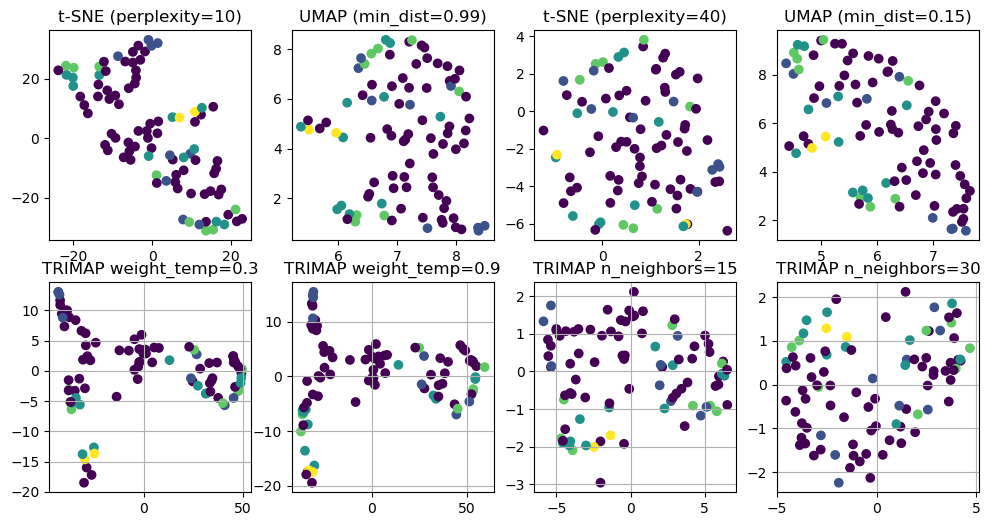

In [38]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 4, 1)
tsne = TSNE(n_components=2, perplexity=10, random_state=42)
X_tsne = tsne.fit_transform(X_test)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred, cmap='viridis')
plt.title('t-SNE (perplexity=10)')

plt.subplot(2, 4, 2)
umap_model = umap.UMAP(n_components=2, min_dist=0.1, random_state=42)
X_umap = umap_model.fit_transform(X_test)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_pred, cmap='viridis')
plt.title('UMAP (min_dist=0.99)')

plt.subplot(2, 4, 3)
tsne = TSNE(n_components=2, perplexity=40, random_state=42)
X_tsne = tsne.fit_transform(X_test)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred, cmap='viridis')
plt.title('t-SNE (perplexity=40)')

plt.subplot(2, 4, 4)
umap_model = umap.UMAP(n_components=2, min_dist=0.15, random_state=42)
X_umap = umap_model.fit_transform(X_test)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_pred, cmap='viridis')
plt.title('UMAP (min_dist=0.15)')

plt.subplot(2, 4, 5)
X_embedded = trimap.TRIMAP(n_dims=2, weight_temp=0.3).fit_transform(X_test.values)
plt.grid()
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_pred, cmap='viridis')
plt.title('TRIMAP weight_temp=0.3')

plt.subplot(2, 4, 6)
X_embedded = trimap.TRIMAP(n_dims=2, weight_temp=0.9).fit_transform(X_test.values)
plt.grid()
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_pred, cmap='viridis')
plt.title('TRIMAP weight_temp=0.9')

plt.subplot(2, 4, 7)
embedding = pacmap.PaCMAP(n_components=2, n_neighbors=15)
X_transformed = embedding.fit_transform(X_test, init="pca")
plt.grid()
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_pred, cmap='viridis')
plt.title('TRIMAP n_neighbors=15')

plt.subplot(2, 4, 8)
embedding = pacmap.PaCMAP(n_components=2, n_neighbors=30)
X_transformed = embedding.fit_transform(X_test, init="pca")
plt.grid()
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_pred, cmap='viridis')
plt.title('TRIMAP n_neighbors=30')


plt.show()